In [222]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [223]:
def funcion(x):
    return np.exp(-x)-x
    

In [224]:
X = np.array([0.5,0.6,0.7])
Y = funcion(X)

In [225]:
Diff = np.zeros(( X.shape[0],Y.shape[0] ))
Diff[:,0] = Y


for i in range(1,len(X)):
    for j in range(i,len(X)):
        Diff[j,i] = Diff[j,i-1] - Diff[j-1,i-1] 

Diff

array([[ 0.10653066,  0.        ,  0.        ],
       [-0.05118836, -0.15771902,  0.        ],
       [-0.2034147 , -0.15222633,  0.00549269]])

In [226]:
def InterpolacionNewton(X,Y,x):
    
    sum_ = Y[0]
    
    Diff = np.zeros(( X.shape[0],Y.shape[0] ))
    h = X[1]-X[0]
    
    Diff[:,0] = Y

    poly = 1.
    
    for i in range(1,len(X)):
        
        poly *= (x-X[i-1])
        
        for j in range(i,len(X)):
            
            Diff[j,i] = Diff[j,i-1] - Diff[j-1,i-1] 
    
        sum_ += poly*Diff[i,i]/(np.math.factorial(i)*h**(i))
        
    return sum_

In [227]:
xt = np.linspace(np.min(X),np.max(X),100)
yt = []

for x in xt:
    yt.append(InterpolacionNewton(X,Y,x))

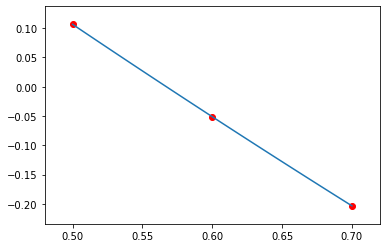

In [228]:
plt.scatter(X,Y,color='r')
plt.plot(xt,yt)

In [229]:
_x = sym.Symbol('x',real=True)
f = InterpolacionNewton(X,Y,_x)
f = sym.simplify(y)
f

0.275321724560097*x**2 - 1.88286377426816*x + 0.979414079813288

In [230]:
df = sym.diff(f,_x,1)
d2f = sym.diff(f,_x,2)/2

In [231]:
def encontrar_x3(f):
    _d2f = sym.lambdify([_x],d2f,'numpy') 
    a = _d2f(0)
    _df = sym.lambdify([_x],df,'numpy') 
    b = _df(0)
    _f = sym.lambdify([_x],f,'numpy') 
    c = _f(0)
    
    #print(f"a:{a}")
    #print(f"b:{b}")
    #print(f"c:{c}")
    
    if b<0:
        x_3 = (-2*c)/(b-np.sqrt(b**2-4*a*c))
        _f(x_3)
        return x_3,_f(x_3)
        #(-2*c)/(b-np.sqrt(b**2-4*a*c)),_f()
    if b>=0:
        x_3 = (-2*c)/(b+np.sqrt(b**2-4*a*c))
        _f(x_3)
        return x_3,_f(x_3)
        
    print("no deberia entrar aca")
    return (-2*c)/(b+np.sqrt(b**2-4*a*c)),(-2*c)/(b-np.sqrt(b**2-4*a*c))

    

In [232]:
print("La raiz es")
encontrar_x3(f)[0]

La raiz es


0.5672185331491784

In [233]:
encontrar_x3(f)[1]

0.0

In [219]:
epsilon = 1
X = np.array([0.4,0.6,0.8])
Y = funcion(X)
x_0 = X[0]
x_1 = X[1]
x_2 = X[2]
it = 0
error= 1
while error>1e-10 or it<100:
      
    _x = sym.Symbol('x',real=True)
    f = InterpolacionNewton(X,Y,_x)
    f = sym.simplify(y)
    df = sym.diff(f,_x,1)
    d2f = sym.diff(f,_x,2)/2
    f_raiz = encontrar_x3(f)[1]
    x_raiz =encontrar_x3(f)[0]
    
    error = np.abs(f_raiz)
    it+=1
    x_2 = (x_0+x_1)/2
    X = np.array([x_0,x_2,x_1])
    Y = funcion(X)
    
print(f_raiz,x)
    

0.0 0.7
